import python modules

In [1]:
from scipy import stats
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


/home/paul/Software/anaconda2/envs/ds36_env/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Table of Contents
1. [Background](#background)<br><br>
2. [Hypothesis testing with one sample](#onesamp)<br>
    2a. [if population sigma is unknown -> t distribution](#t_1s)<br>
    2b. [if population sigma is known -> normal distribution](#norm_1s)<br>
    2c. [for a poplation proportion -> binomial as normal](#bi_1s)<br><br>
3. [Hypothesis testing with two independent samples](#twosamp_ind)<br>
    3a. [Two independent population means](#twosamp_ind_means)<br>
    3b. [Cohen's d and effect size](#cohen_d)<br>
    3c. [Two independent population proportions](#ind_pro)<br><br>
4. [Hypothesis testing with two dependent samples](#twosamp_dep)<br><br>
5. [Chi squared test](#chi_sq)<br>
    5a. [Goodness-of-fit](#chi_fit)<br>
    5b. [Independence](#chi_ind)<br>
    5c. [Homogeneity](#chi_homo)<br>
    5d. [Single variance](#chi_var)<br><br>
6. [ANOVA](#anova)<br>
    6a. [One-way ANOVA](#oneway)<br>
    6b. [Two-way ANOVA](#twoway)<br>
    6c. [Test of Two Variances](#twovar)<br>

### Background<a class="anchor" id="background"></a>

A **hypothesis test** is a statistical inference that makes a decision about the validity of an assertion which has been translated into a statistic. It considers a **null hypothesis** $H_0$ against an **alternative hypothesis** $H_1$ or $H_a$. The null hypothesis represents some default position that the results of the test will either rejected or failed to reject in favor of the alternative hypothesis which is the opposite of the null.
> $H_0$ null hypothesis<br>
$H_1$ alternative hypothesis 

Before data collection, a **signifiance level**, $\alpha$, is chosen. It represents the probability that the rest will incorrectly reject the null hypothesis (that is reject it even though it is true). After data collection, the signifiance level is compared against the **p-value** which is the probability of observing a test statistic at least as extreme as the one actually obsevered given that null hypothesis is true. 
>If p-value < $\alpha$ then the null hypothesis is rejected at significance level $\alpha$. Otherwise it is "not rejected" (this does not mean it is accepted as true)<br><br>
Note: p-values are prone to misuse and a topic of debate. Here are a few quick points, further reading is recommended:
1. $P(D|H_0) <> P(H_0|D)$. The former is what the p-value tells you. The latter is what you want to know, 
2. The choice of $\alpha$ sets up a false dichotomy. A p-value = 0.051 vs. = 0.049 is probabilistically very similar, but give opposite conclusions at $\alpha$ = 0.05.
3. When comparing two groups the "nil hypothesis," $\bar{X_1}-\bar{X_2} = 0$, is virtiually never true. There is always a difference however slight, so a large enough sample size will always be statistically significant.  
4. Temptation to introduce bias through "data peeking". That is, running more exmeriments after the planned number gives a p-value is just over $\alpha$ or terminating experiments early if the p-value is alright significant.
5. With many studies being preformed, some will appear significany by chance. In the case of $\alpha$ = 0.05, 1 in 20 experiments would be false positives. This situation is made worse by a lack of reporting negative results (the "file drawer problem").

The **signifiance** of a test is the probability of making a **type 1 error** or **false positive**. Also of interest is the probability failing to reject the null hypothesis when it is false $\beta$. That is a **type 2 error** or **false negative**. This is more commonly expression as the probability of *not* making a type 2 error or the **power** of the test $1 - \beta$.<br>
>$\alpha$ = P(type 1)<br>
$\beta$ = P(type 2)<br><br>
signifiance = $\alpha$<br>
power = $1 - \beta$

Tests can be left-tailed, right-tailed or two-tailed depending on the hypothesis:<br>
>Left-tailed: p-value is in the left tail of the distribution
$H_0$: $\mu >= x$ and $H_1$: $\mu < x$<br>
Right-tailed: p-value is in the right tail of the distribution
$H_0$: $\mu <= x$ and $H_1$: $\mu > x$<br>
Two-tailed: p-value split evenly between both tails of the distribution
$H_0$: $\mu = x$ and $H_1$: $\mu <> x$<br> 

### Hypothesis testing with one sample<a class="anchor" id="onesamp"></a>

Tests comparing a sample statistic to a hypothesized value for the corresponding population parameter.

#### single population mean -  unknown population standard deviation <a class="anchor" id="t_1s"></a> 

When the population standard deviation is unknown (as is usually the case) a Students t-test should be used 

**prerequisites:**
1. The data must come from a simple random sample. That is, any group of n individuals from the population was equally likely to be chosen for the sample). 
2. The sample mean distribution must be approximately normal. That is, if n is small the population distribution should be normal where if n is large this is not required.

**the t-distribution:**
1. Select the t distribution with n - 1 degrees of freedom: $t_{dof} = n-1$
2. The hypothesis value is the center of the t distribution: $t_{\mu} = h_0$
3. The sample standard deviation of the mean approximates sigma: $t_{\sigma} = \large \frac{s}{\sqrt{n}}$<br>
4. Alternatively, calculate the t-score: $t_{score} = \large\frac{|{\bar{x}-h_0}|}{\frac{s}{\sqrt{n}}}$<br>
*Either way remember to use n - 1 in the denominator when calculating s.*

**the p-value:**
1. Find the probability of observing a value at least as extreme as $\bar{x}$ using the appropriate tail(s) of the t-distribution. This can be done using the Scipy stats.ttest_1samp method, which returns a tuple (test_statistic, p-value). 
2. The p-value returned by stats.ttest_1samp is for a two tailed t-test. For a one tailed test divide by two. This gives the tail that might be interesting (x_bar > $h_0$ right-tail, x_bar < $h_0$ left tail). The test statistic is the number of standard deviations $\bar{x}$ is from ${h_0}$. 

In [2]:
# Illowsky - Example 9.20
# right tailed t-test
data = [1.11, 1.07, 1.11, 1.07, 1.12, 1.08, 0.98, 0.98, 1.02, 0.95, 0.95]
h = 1.00 # null hypothesis: mean <= 1

# using scaled t-distribution (long way for explainatory purposes)
n = len(data)
x_bar = np.mean(data)
s = np.std(data, ddof=1) # sample std -> ddof = 1
pval = stats.t.sf(x_bar, n - 1, h, s / np.sqrt(n)) 
print('The p-value is {0:.4f} (using a scaled t-distribution)'.format(pval))

# using a t-score (another long way for explainatory purposes)
t_score = np.abs(x_bar - h) / (s / np.sqrt(n))
pval = stats.t.sf(t_score, n - 1)
print('The p-value is {0:.4f} (using a t-score)'.format(pval))

# using scipy method
t_score, pval = stats.ttest_1samp(data, h)
pval = pval / 2
print('The p-value is {0:.4f} (using scipy method, dividing by two'
      'for 1 tailed test)'.format(pval))
# The one-tail that's interesting is half the two-tailed
#  i.e. hypothesis mean <= 1 will never be rejected by a mean <= 1
#  If you really want the one tail for the side that will never reject the null  
#  print(1 - (stats.ttest_1samp(data, h)[1]) / 2) 

The p-value is 0.0359 (using a scaled t-distribution)
The p-value is 0.0359 (using a t-score)
The p-value is 0.0359 (using scipy method, dividing by twofor 1 tailed test)


#### single population mean - known population standard deviation<a class="anchor" id="norm_1s"></a> 

When the population standard deviation is known (rarely the case) the p-value should be calculated similar to the t-test described above, except using a normal distribution and the population standard deviation. This is sometimes called a z-test.

$$\bar{X} \sim N(\mu_X, \frac{\sigma_X}{{\sqrt{n}}})$$

In [3]:
# Illowsky - Example 9.9
#  null hypothesis mu >= h -> use left tail test
#  right tail test included for playing with inputs 
h = 15  
n = 10
x_bar = 17   # Sample mean
sigma = 0.5  # Known population standard deviation

pval_righttail = stats.norm.cdf(x_bar, h, (sigma / np.sqrt(n))) # Left tail test
#pval_lefttail = 1 - stats.norm.cdf(x_bar, h, (sigma / np.sqrt(n))) # Right tail test
pval_lefttail = stats.norm.sf(x_bar, h, (sigma / np.sqrt(n))) # More accurate right tail test

print('For the sample mean = {0}'.format(x_bar))
print('  If the null hypothesis was a population mean <= {0}, the p-value = {1:.4f}'\
         .format(h, pval_righttail))
print('  If the null hypothesis was a population mean >= {0}, the p-value = {1:.4f}'\
         .format(h, pval_lefttail))

# The z-test is not implemented in scipy. 
# The statsmodels module has an implementation, but it uses the sample standard deviation which
# defeats using it when the population standard deviation is known.

For the sample mean = 17
  If the null hypothesis was a population mean <= 15, the p-value = 1.0000
  If the null hypothesis was a population mean >= 15, the p-value = 0.0000


In [4]:
# Illowsky - Example 9.14 
#  null hypothesis mu <= h -> use right tail test
#  see previous example 9.9 for mu >= h
h = 16.43  
n = 15
x_bar = 16   # Sample mean
sigma = 0.8  # Known population standard deviation

pval_righttail = stats.norm.cdf(x_bar, h, (sigma / np.sqrt(n))) # Left tail test
pval_lefttail = stats.norm.sf(x_bar, h, (sigma / np.sqrt(n))) # More accurate right tail test

print('  For the null hypothesis of a population mean <= {0}, the p-value = {1:.4f}'\
         .format(h, pval_righttail))

  For the null hypothesis of a population mean <= 16.43, the p-value = 0.0187


#### single population proportion<a class="anchor" id="bi_1s"></a> 

Approximate the proportion as a normal distribution for a binomial divided by n.<br><br>
$$\large{P}' \sim N(p, \sqrt{\normalsize\frac{p q}{n}})$$

Note: Use the p and q from the hypothesis in determining $\sigma$ of the distribution.<br>
Note: Requires np > 5 and nq > 5 for an accurate result.<br>
Note: Also requires data to come from a simple random sample.

In [5]:
# Illowsky - Example 9.17
# two-tailed test - single population proportion
h = 0.50  # hypothesis proportion
n = 100   # number of samples
p = 0.53  # proportion observed

sigma = np.sqrt(h * (1 - h) / n)  # for a proportion

# more explainatory code to p-value 
if h < p:
    right_tail = stats.norm.sf(p, h, sigma)
    left_tail = stats.norm.cdf(h + (h - p), h, sigma)
else:
    right_tail = stats.norm.sf(h + (h - p), h, sigma)
    left_tail = stats.norm.cdf(p, h, sigma)
pval = right_tail + left_tail
print(' For the null hypothesis of a population proportion of {0} the p-value = {1:.4f}'.format(h, pval))

# one line to p-value       
pval = 2 * stats.norm.sf(h + np.abs(h - p), h, sigma)
print(' For the null hypothesis of a population proportion of {0} the p-value = {1:.4f}'.format(h, pval))

 For the null hypothesis of a population proportion of 0.5 the p-value = 0.5485
 For the null hypothesis of a population proportion of 0.5 the p-value = 0.5485


### Hypothesis testing with two samples<a class="anchor" id="twosamp_ind"></a> 

Tests comparing a sample statistics across two groups. The test are treated differently depending on whether the groups consist of unrelated individuals (independent samples) or matched pairs (dependent samples). 

#### Population means for two independent samples<a class="anchor" id="twosamp_ind_means"></a> 

**prerequisites:**
1. Simple random samples from two independent populations
2. The distribution of the sample means should be normal. That is, if sample sizes are small the population distributions must be normal.

**the p-value:**
1. Generally the null hypothesis is that the sample means are the same: $\bar{X_1}-\bar{X_2} = 0$
2. Select the t-distribution degrees of freedom depending on whether the population standard deviations are known to be equal.
> If the populations have equal standard deviations, then a pooled standard deviation may be used with $dof = n1 + n2 - 2$<br>
> If the populations standard deviations may be different, then the **Aspin-Welch** test should be used. The $dof$ equation is somewhat involved to input here, but easily searched up and coded in the example below.
3. Calculate the t-score test statistic as the difference in sample means divided by the standard error:<br>
$$\frac{\bar{X_1}-\bar{X_2}}{\sigma}$$<br>
$$\sigma = \sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}$$
4. Find the probability of observing a value at least as extreme as $\bar{x}$. This can be done using the Scipy stats.ttest_ind method, which returns a tuple (test_statistic, p-value). Note method parameter equal_var should be set to False if the populations may have unequal variences or different sizes.

In [6]:
# Illowsky - Example 10.1
#  Two independent samples, unknown, possibly different, standard deviations
#  two-tailed test
n_x = 9      # number of x
x_bar = 2    # average for x
s_x = 0.866  # sample sigma for x

n_y = 16     # number of y
y_bar = 3.2  # average for y
s_y = 1      # sample sigma for y

h = 0        # Hypothesis X1_bar - X2_bar = 0

# DOF - Welch Test
dof = ((s_x ** 2 / n_x + s_y ** 2 / n_y) ** 2 / 
      (1 / (n_x - 1) * (s_x ** 2 / n_x) ** 2 + 
       1 / (n_y - 1) * (s_y ** 2 / n_y) ** 2))
print('The number of degrees of freedom using the Welch test = {0:.2f}'.format(dof))

std_err = np.sqrt((s_x ** 2 / n_x) + (s_y ** 2 / n_y))
t_score = (np.abs(x_bar - y_bar)) / std_err
pval = stats.t.sf(t_score, dof) * 2   # * 2 for two-tailed test
print('The p-value for the two population means being the same = {0:.4f}'.format(pval))

# If the data is available scipy.stats.ttest_ind(a, b, equal_var=False) can be used
# (see Example 10.3)

The number of degrees of freedom using the Welch test = 18.85
The p-value for the two population means being the same = 0.0054


In [7]:
# Illowsky - Example 10.2 and 10.4
# h0: X_bar > Y_bar (right-tailed distribution)  
n_x = 11
x_bar = 4
s_x = 1.5

n_y = 9
y_bar = 3.5
s_y = 1

# DOF - Welch Test
dof = ((s_x ** 2 / n_x + s_y ** 2 / n_y) ** 2 / 
      (1 / (n_x - 1) * (s_x ** 2 / n_x) ** 2 + 
       1 / (n_y - 1) * (s_y ** 2 / n_y) ** 2))

std_err = np.sqrt(s_x ** 2 / n_x + s_y ** 2 / n_y)
pval = (stats.t.sf(x_bar - y_bar, dof, 0, std_err))

# If raw data are available scipy stats.ttest_ind can be used. See example 10.3
print('The p-value for the first population mean being greater than the face-to-face '
      'population mean = {0:.4f}'.format(pval))

# Using t_score on standard t_dof
t_score = abs(x_bar - y_bar) / std_err
pval = (stats.t.sf(t_score, dof))
print('The p-value for the first population mean being greater than the face-to-face '
      'population mean = {0:.4f}'.format(pval))
print()

# Example 10.4 
# cohen's d (see discription below)
s_pooled = np.sqrt((((n_x - 1) * s_x ** 2) + ((n_y - 1) * s_y ** 2)) / (n_x + n_y - 2))
cohen_d = np.abs(x_bar - y_bar) / s_pooled

print("The Cohen's d = {0:.3f}".format(cohen_d))


The p-value for the first population mean being greater than the face-to-face population mean = 0.1928
The p-value for the first population mean being greater than the face-to-face population mean = 0.1928

The Cohen's d = 0.384


In [8]:
# Illowsky - Example 10.3 and 10.5
data_online = np.array(
    [67.6, 41.2, 85.3, 55.9, 82.4, 91.2, 73.5, 94.1, 64.7, 64.7,
     70.6, 38.2, 61.8, 88.2, 70.6, 58.8, 91.2, 73.5, 82.4, 35.5,
     94.1, 88.2, 64.7, 55.9, 88.2, 97.1, 85.3, 61.8, 79.4, 79.4])

data_face = np.array(
    [77.9, 95.3, 81.2, 74.1, 98.8, 88.2, 85.9, 92.9, 87.1, 88.2,
     69.4, 57.6, 69.4, 67.1, 97.6, 85.9, 88.2, 91.8, 78.8, 71.8,
     98.8, 61.2, 92.9, 90.6, 97.6, 100,  95.3, 83.5, 92.9, 89.4])

t_score, pval = (stats.ttest_ind(data_online, data_face, equal_var=False))
# Note: for possibly unequal population variances or sizes, argument equal_var=False

# For left tailed test (H0: data_online >= data_face)
if np.mean(data_online) < np.mean(data_face):
    pval = pval / 2
else:
    pval = 1 - (pval / 2)
    
print('The p-value for the online population mean being less than the face-to-face '
      'population mean = {0:.4f}'.format(pval))

# Cohen's d - example 10.5 (see discription below)
n_x = len(data_online)
x_bar = np.mean(data_online)
s_x = np.std(data_online, ddof=1)
n_y = len(data_face)
y_bar = np.mean(data_face)
s_y = np.std(data_face, ddof=1)

s_pooled = np.sqrt((((n_x - 1) * s_x ** 2) + ((n_y - 1) * s_y ** 2)) / (n_x + n_y - 2))
cohen_d = np.abs(x_bar - y_bar) / s_pooled

print("The Cohen's d = {0:.3f}".format(cohen_d))


The p-value for the online population mean being less than the face-to-face population mean = 0.0011
The Cohen's d = 0.834


#### Cohen's d and effect size<a class="anchor" id="cohen_d"></a> 

While p-values can test for statistical signifiance in the difference of two populations, they do not report on the **effect size** or magnitude of this difference.

**Cohen's d** is a common measure of effect size equal to the difference of two means divided by their pooled standard deviation. Standards for interpreting a Cohen's d are: 0.2 is small, 0.5 is medium and 0.8 is large.

In [9]:
# Examples (10.4 and 10.5) in previous section

#### two independent population proportions<a class="anchor" id="ind_pro"></a> 

**prerequisites:**
1. Simple random samples from two independent populations
2. Number of success and number of failures >5 for each sample.
3. The population sizes > 10 times the sample sizes.

**the p-value:**
1. Select the null and alternative hypothesis. For two populations A and B. Generally that the proportions are the same.<br> 
$H_0$: $p_a - p_b = 0$<br>
$p_a = \large\frac{x_a}{n_a}$<br>
$x_a =$ number of individuals meeting the condition in group A<br>
$n_a =$ total number of individuals in group A<br>
(likewise for group B)<br><br>
2. Use a pooled proportion and sample number to calculate the test statistic.<br><br>
pooled proportion: $p_c = \large\frac{x_a + x_b}{n_a + n_b}$<br><br>
test statistic: z-score $= \large\frac{p_a - p_b}{\sqrt{p_c (1 - p_c) (\large\frac{1}{n_a}+\frac{1}{n_b}}\normalsize)}$


In [10]:
# Illowsky - Example 10.8 
x_a = 20
n_a = 200
x_b = 12
n_b = 200

p_a = (x_a / n_a)
p_b = (x_b / n_b)
p_c = (x_a + x_b) / (n_a + n_b)  # pooled proportion
sigma = np.sqrt(p_c * (1 - p_c) * (1 / n_a + 1 / n_b))
z_score = (p_a - p_b) / sigma
p_val = (stats.norm.sf(z_score) * 2)
print('The p-value for the proportion = {0:.4f}'.format(p_val))

# The statsmodels module has a function for this
z_score, p_val = sm.stats.proportions_ztest([x_a, x_b], [n_a, n_b])
print('The p-value for the proportion = {0:.4f} (using statsmodels module)'.format(p_val))

The p-value for the proportion = 0.1404
The p-value for the proportion = 0.1404 (using statsmodels module)


### Hypothesis testing with two dependent samples<a class="anchor" id="twosamp_dep"></a>

**prerequisites:**
1. Simple random samples from two populations with matched pairs of samples drawn from the source.
2. The distribution of the sample means should be normal. That is, if sample sizes are small the population distributions must be normal.

**the p-value:**
1. Generally the null hypothesis is that there is no difference between the two groups
2. The differences of the matched pairs are used for the hypothesis test essientially making it a test for one sample where that sample is the differences.
t-score $=\large\frac{\bar{x}_d}{\Large(\frac{s_d}{\sqrt{n}})}$<br>
$\bar{x}_d$ = the mean difference of the samples<br>
${s_d}$ = the standard deviation of the difference of the samples<br>

In [11]:
# Illowsky - Example 10.11
# left-tailed, two dependent samples
data_before = np.array([6.6, 6.5, 9.0, 10.3, 11.3, 8.1, 6.3, 11.6])
data_after  = np.array([6.8, 2.4, 7.4,  8.5,  8.1, 6.1, 3.4,  2.0])

# Uncomment to test directionality (matters for single tail tests) 
# data_before, data_after = data_after, data_before

diff = data_after - data_before
n = len(diff)  
x_bar = diff.mean()
s = diff.std(ddof=1)
t_score = x_bar / (s / np.sqrt(n))
p_val = stats.t.cdf(t_score, n - 1)
print('The p-value is {0:.4f}'.format(p_val))

# scipy stats method ttest_rel
t_score, p_val = stats.ttest_rel(data_after, data_before)
# adjust of left-tailed test, h0 = after - before < 0 (after < before)
if x_bar < 0:
    p_val = p_val / 2   # divide p-val by two for one tailed test
else:
    p_val = 1 - (p_val / 2)
print('The p-value is {0:.4f} (using scipy ttest_rel)'.format(p_val))

The p-value is 0.0095
The p-value is 0.0095 (using scipy ttest_rel)


In [12]:
# Illowsky - Example 10.12 
# right-tailed, two dependent samples
data_before = np.array([205, 241, 338, 368])
data_after  = np.array([295, 252, 330, 360])

diff = data_after - data_before
n = len(diff)
x_bar = diff.mean()
s = diff.std(ddof=1)
t_score = x_bar / (s / np.sqrt(n))
p_val = stats.t.sf(t_score, n - 1)
print('The p-value is {0:.4f}'.format(p_val))

t_score, p_val = stats.ttest_rel(data_after, data_before)
# adjust of left-tailed test, h0 = after - before > 0 (after > before)
if x_bar > 0:
    p_val = p_val / 2
else:
    p_val = 1 - (p_val / 2)
print('The p-value is {0:.4f} (using scipy ttest_rel)'.format(p_val))

The p-value is 0.2149
The p-value is 0.2149 (using scipy ttest_rel)


### Chi-squared test<a class="anchor" id="chi_sq"></a> 

Chi-squared hypothesis testing is used for assessing the probability of independence in categorical data. This extends to goodness-of-fit, homogeneity and single variance tests. It uses the chi-squared distribution which is the sum of k independent, squared standard normal distributions, where k equals the degrees of freedom. The resulting distribution is always greater than 0, nonsymmetric and skewed right.The formula for dof depends on the application.

$\chi^2_{df}$<br> 
$\mu = df$<br>
$\sigma = \sqrt{2 df}$

#### Goodness-of-fit<a class="anchor" id="chi_fit"></a> 

Test to determine how well data fits a particular distribution (commonly a uniform or normal distribution). It involves a bin by bin comparison of expected vs. observed frequencies.

$\large\sum_k \large(\frac{(O\ -\ E)^2}{E})$<br>
O = observed<br>
E = expected<br>
k = number of different bins<br>
df = k - 1<br>

*note: the expected value for each bin must be at least 5*

*note: the test is nearly always right tailed (since the chi-squared distribution is always positive, the probability of observing a deviation from observed equal to expected that is at least as large as the deviation seen in the data)*

In [13]:
# Illowsky - Example 11.2
#  Goodness-of-fit to uniform distribution
obs = np.array([15, 12,  9,  9, 15])  # Oberved distribution

# Note, expected value and validity check for uniform distribution
#   could be rewriten as array to handle other distributions
exp = np.mean(obs) # Expected distribution
if exp < 5:
    raise UserWarning('''The expected value < 5''')

dof = len(obs) - 1
chi2_score = sum(((obs - exp) ** 2) / exp)
p_val = stats.chi2.sf(chi2_score, dof)
print('The chi^2 p-value = {0:.4f}'.format(p_val))

# one line scipy stats method
#   dof defaults to k - 1, method accepts ddof argument which will set dof to k - 1 - ddof
chi2_score, p_val = stats.chisquare(obs, exp)
print('The chi^2 p-value = {0:.4f} (using stats.chisquare method)'.format(p_val))

The chi^2 p-value = 0.5578
The chi^2 p-value = 0.5578 (using stats.chisquare method)


#### Independence<a class="anchor" id="chi_ind"></a> 

A chi-squared test that determines whether multiple distributions are independent. It compares the observed contingency table against an expected contingency table calculated assuming independence. 

$\large\sum_{i,\ j}\large(\frac{(O\ -\ E)^2}{E})$<br><br>
$O = observed$<br>
$E = expected = \large\frac{row\_total \ \bullet \ column\_total}{ total\_surveyed}$ <br><br>
$k = number\_of\_bins$<br>
$df = (number\_of\_columns - 1)(number\_of\_rows - 1)$<br>

Notes:<br>
1. The expected value for each bin must be at least 5<br>
2. The categories must be mutually exclusive (each individual count occurs in exactly 1 bin)
3. Choosing categories that make sence is important and not always obvious. Compare example 11.6 and 11.6 - extended below.
4. The chi-squared test only informs on the existance (or lack) of independence amoung the categories and not any of the details such as strength of dependence. 

In [14]:
# Illowsky - Example 11.6
data = np.array([[111,  96,  48],
                 [ 96, 133,  61],
                 [ 91, 150,  53]])

n_terms = data.sum()
n_rows = len(data[:, 0])
n_cols = len(data[0, :])
dof = (n_rows - 1) * (n_cols - 1)

expected = np.array([[(data[:, j].sum() * data[i, :].sum()) / n_terms 
                      for j in range(n_cols)] for i in range(n_rows)])

chi2_score = (((data - expected) ** 2) / expected).sum()
p_val = stats.chi2.sf(chi2_score, dof)
print('The chi^2 p-value = {0:.4f}'.format(p_val))

# scipy stats method chi2_contingency
chi2_score, p_val, dof, expected = stats.chi2_contingency(data)
print('The chi^2 p-value = {0:.4f} (stats.chi2_contingency method)'.format(p_val))

# make sure all expected data values are >= 5
if np.any(expected < 5):
    raise UserWarning('''An expected data value is < 5.''')

The chi^2 p-value = 0.0113
The chi^2 p-value = 0.0113 (stats.chi2_contingency method)


In [15]:
# Illowsky - Example 11.6 - extended
#   Having selected groups so the second was split into 3 similar groups
#   might have changed statistical significance
data = np.array([[111,  96,  48],
                 [ 29,  38,  19],
                 [ 31,  43,  20],
                 [ 33,  52,  22],
                 [ 91, 150,  53]])

n_terms = data.sum()
n_rows = len(data[:, 0])
n_cols = len(data[0, :])
dof = (n_rows - 1) * (n_cols - 1)

expected = np.array([[(data[:, j].sum() * data[i, :].sum()) / n_terms 
                      for j in range(n_cols)] for i in range(n_rows)])

chi2_score = (((data - expected) ** 2) / expected).sum()
p_val = stats.chi2.sf(chi2_score, dof)
print('The chi^2 p-value = {0:.4f}'.format(p_val))

# scipy stats method chi2_contingency
chi2_score, p_val, dof, expected = stats.chi2_contingency(data)
print('The chi^2 p-value = {0:.4f} (stats.chi2_contingency method)'.format(p_val))

# make sure all expected data values are >= 5
if np.any(expected < 5):
    raise UserWarning('''An expected data value is < 5.''')

The chi^2 p-value = 0.0851
The chi^2 p-value = 0.0851 (stats.chi2_contingency method)


#### Homogeneity<a class="anchor" id="chi_homo"></a> 

A chi-squared test that determines the probability that two populations have the same, unknown, distribution. It follow the same proceedure as the test for [independence](#chi_ind). The contingency table always has two rows, one for each distribution, making the dof = number of columns.

In [16]:
# Illowsky - Example 11.8
data = np.array([[72, 84, 49, 45],
                 [91, 86, 88, 35]])

n_terms = data.sum()
n_cols = len(data[0, :])
dof = n_cols - 1

expected = np.array([[(data[:,i].sum() * data[j,:].sum()) / n_terms 
                      for i in range(n_cols)] for j in range(2)])

chi2_score = (((data - expected) ** 2) / expected).sum()
p_val = stats.chi2.sf(chi2_score, dof)
print('The chi^2 p-value = {0:.4f}'.format(p_val))

# scipy stats method chi2_contingency
chi2_score, p_val, dof, expected = stats.chi2_contingency(data)
print('The chi^2 p-value = {0:.4f} (stats.chi2_contingency method)'.format(p_val))

# make sure all expected data values are >= 5
if np.any(expected < 5):
    raise UserWarning('''An expected data value is < 5.''')

The chi^2 p-value = 0.0175
The chi^2 p-value = 0.0175 (stats.chi2_contingency method)


#### Test of a single variance<a class="anchor" id="chi_var"></a> 

A chi-squared test that determines whther the population variance is different than a hypothesized value. Unlike other common chi-squared tests mentioned above, it is not for categorical and the choice of tail (left-, right- or two-tailed) varies with the hypothesis.<br><br>
$\large\frac{(n-1)\ s^2}{\sigma^2}$<br><br>
$n$ = number of data points<br>
$s^2$ = sample variance<br>
$\sigma^2$ = population variance (hypothesized value)<br>
$dof$ = n - 1<br>

Note: Assumes that the underlying distribution is normal.

In [17]:
# Illowsky - Example 11.11
#   left tailed - H0: s^2 < sigma*2
n = 25
s = 3.5
h = 7.2

dof = n - 1
chi_stat = ((n - 1) * s ** 2) / h ** 2
p_val = stats.chi2.cdf(chi_stat, dof)  # left tailed

print('For n = {0}, s = {1} and hypothesized sigma = {2}, the p-value = {3:.8f}'\
      .format(n, s, h, p_val))

For n = 25, s = 3.5 and hypothesized sigma = 7.2, the p-value = 0.00004213


In [18]:
# Illowsky - Example 11.11
#   right tailed - H0: s^2 < sigma*2
n = 25
s = 7.2
h = 3.5

dof = n - 1
chi_stat = ((n - 1) * s ** 2) / h ** 2
p_val = stats.chi2.sf(chi_stat, dof)  # right tailed

print('For n = {0}, s = {1} and hypothesized sigma = {2}, the p-value = {3:.16f}'\
      .format(n, s, h, p_val))

For n = 25, s = 7.2 and hypothesized sigma = 3.5, the p-value = 0.0000000000162362


### Test for correlation coefficient significance
Tests null hypothesis that the population correlation coefficient is 0

In [19]:
x = [ 65,  67,  71,  71,  66,  75,  67,  70,  71,  69,  69]
y = [175, 133, 185, 163, 126, 198, 153, 163, 159, 151, 159]

r, p_val = stats.pearsonr(x, y)
print('r = {0:.4f}, r^2 = {1:.4f}, p_val = {2:.4f}'.format(r, r ** 2, p_val))

r = 0.6631, r^2 = 0.4397, p_val = 0.0262


### ANOVA<a class="anchor" id="anova"></a>

Analysis of variance (ANOVA) is a hypothesis test to determine whether a statistically significant difference existis amoung several population means. The null hypothesis is that all groups are drawn from populations with the same mean.


#### One-way ANOVA<a class="anchor" id="oneway"></a>

One-way, or single-factor ANOVA, tests the dependence of a continuous output variable on a single categorical input variable. It does this by comparing the ratio of systematic variance (between categories) to unsystematic variance (within categories). It can be seen as a regression model with a single categorical predictor.

Assumptions:<br>
1) Each population from which a sample is taken is normal<br>
2) All samples are randomly selected and independent<br>
3) The populations have equal standard deviations (homogeneity of variance)<br>
4) The single factor is a categorical variable<br>
5) The response is a numerical variable on an interval or ratio scale<br>

Calculation:<br>
1) A p-value is calculated using an f-distribution.<br>
2) An f-ratio, the test statistic, is a the variance of the sample means and the mean of the sample variances (see text or code below for calculation details).<br>
3) It has two sets of degrees of freedom; one for the numerator (dfn = k - 1) and one for the denominator (dfd = n - k).<br>

> $F = \large\frac{MS_{between}}{MS_{within}}$<br>
$MS_{between}$ = mean square variance between groups<br>
$MS_{within}$ = mean square variance within groups<br>
dfn = degrees of freedom in $MS_{between} = k - 1$<br>
dfd = degrees of freedom in $MS_{within} = n - k$<br>
k = number of groups<br>
n = total number of samples<br>

In [20]:
# Illowsky 13.1
#  one-way ANOVA
data = ([[5, 4.5, 4, 3],
         [3.5, 7, 4.5],
         [8, 4, 3.5]])

n = sum([len(row) for row in data])
k = len(data)

ss_between = (sum([sum(row) ** 2 / len(row) for row in data]) - 
              sum([sum(row) for row in data]) ** 2 / n)

ss_total = (sum([value ** 2 for row in data for value in row]) - 
           sum(value for row in data for value in row) ** 2 / n)

ss_within = ss_total - ss_between

f_ratio = (ss_between / (k - 1)) / (ss_within / (n - k))
p_val = stats.f.sf(f_ratio, (k - 1), (n - k))  # always right-tailed 
print('The p-value = {0:.4f}'.format(p_val))

# SciPy method
f_score, p_val = stats.f_oneway(*data)
print('The p-value = {0:.4f} (using SciPy method)'.format(p_val))

The p-value = 0.6991
The p-value = 0.6991 (using SciPy method)


In [21]:
# Illowsky - Example 13.3
#  one-way ANOVA - data grouped by column - scipy method
data = np.array([[2.17, 2.63, 2.63, 3.79],
                 [1.85, 1.77, 3.78, 3.45],
                 [2.83, 3.25, 4.00, 3.08],
                 [1.69, 1.86, 2.55, 2.26],
                 [3.33, 2.21, 2.45, 3.18]])
data = data.transpose() # Data given with groups as columns
f_score, p_val = stats.f_oneway(*data)
print('The p-value = {0:.4f} (using SciPy method)'.format(p_val))

The p-value = 0.1241 (using SciPy method)


In [34]:
# Marsja - plantgrowth example
data = pd.read_csv('data/PlantGrowth.csv', index_col=0)
data.iloc[np.r_[:3, -3:0]] 

,weight,group
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
28,6.15,trt2
29,5.80,trt2
30,5.26,trt2


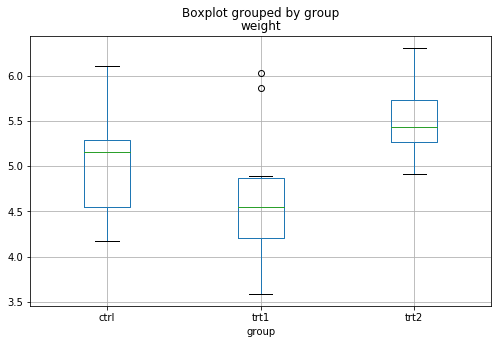

In [35]:
# Data exploration - boxplot
data.boxplot('weight', by='group', figsize=(8, 5))
plt.show()
plt.close()

In [36]:
# Using SciPy method
#  simple, but doesn't give effect sizes
grps = pd.unique(data.group.values)
d_data = {grp:data['weight'][data.group == grp] for grp in grps}
f_score, p_val = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])
print('The p-value = {0:.4f} (using SciPy method)'.format(p_val))

The p-value = 0.0159 (using SciPy method)


In [39]:
# Using Statsmodules
model = smf.ols('weight ~ group', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)

# Effect size
def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov
 
def omega_squared(aov):
    mse = aov['sum_sq'][-1] / aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = ((aov[:-1]['sum_sq'] - (aov[:-1]['df']*mse)) / 
                       (sum(aov['sum_sq']) + mse))
    return aov
 
eta_squared(aov_table)
omega_squared(aov_table)

# ANOVA Table w/ effectsize
aov_table.astype(float).round(4)

,sum_sq,df,F,PR(>F),eta_sq,omega_sq
group,3.7663,2.0,4.8461,0.0159,0.2641,0.2041
Residual,10.4921,27.0,NaN,NaN,NaN,NaN


#### Two-way ANOVA<a class="anchor" id="twoway"></a>

Two-way, or two-factor ANOVA, tests the dependence of a continuous output variable on two categorical input variables (one-way ANOVA done twice) and on any interaction between those input variables (the additional information provided by not just doing one-way ANOVA twice).

The process is similar, but $MS_between$ the mean square varience between groups is spilt into group A, group B and a term for the interaction between A and B. Also, it has the additional restriction that the number of observations in each cell of the contingency table must be balanced (equal).

In [26]:
# Marsja - Two-way ANOVA example
#   load data
data = pd.read_csv('data/ToothGrowth.csv')
data.iloc[np.r_[:3, -3:0]]  # Show top and bottom of data frame

,Unnamed: 0,len,supp,dose
0,1,4.2,VC,0.5
1,2,11.5,VC,0.5
2,3,7.3,VC,0.5
57,58,27.3,OJ,2.0
58,59,29.4,OJ,2.0
59,60,23.0,OJ,2.0


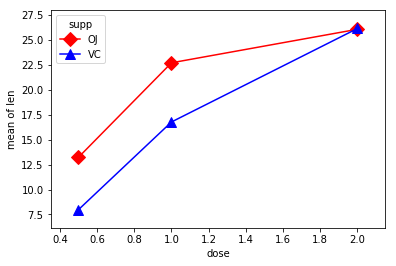

In [27]:
#   Data exploration - statsmodels interaction plot
#     simplifies plotting of factors from pandas dataframe
#     points are averages by factor grouped by trace
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(data.dose, data.supp, data.len,
             colors=['red','blue'], markers=['D','^'], ms='10')
plt.show()
plt.close()

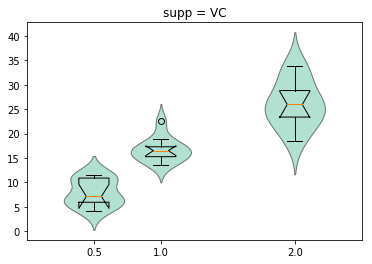

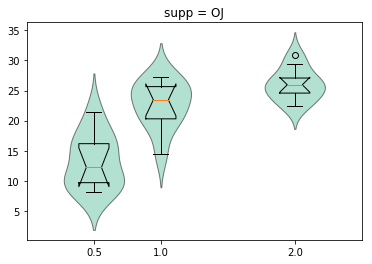

In [28]:
#  Data exploration - violin plots
from statsmodels.graphics.boxplots import violinplot

for supp in data.loc[:, 'supp'].unique():
    supp_data = data.loc[data.loc[:, 'supp'] == supp]
    positions = supp_data.loc[:, 'dose'].unique()
    plot_data = []
    for position in positions:
        plot_data.append(supp_data.loc[supp_data.loc[:, 'dose'] == position, 'len'])
    fig = violinplot([*plot_data], positions=positions)
    plt.title('supp = {0}'.format(supp))
    
plt.show()
plt.close()

In [29]:
# Two-way ANOVA using SciPy and Pandas
n = len(data.len)

# degrees of freedom
df_a = len(data.supp.unique()) - 1  
df_b = len(data.dose.unique()) - 1
df_axb = df_a * df_b
df_w = n - (len(data.supp.unique()) * len(data.dose.unique()))

# sums of squares
grand_mean = data['len'].mean()
ssq_a = sum([(data[data.supp == supp].len.mean() - grand_mean) ** 2 
             for supp in data.supp])
ssq_b = sum([(data[data.dose == dose].len.mean() - grand_mean) ** 2
             for dose in data.dose])
ssq_t = sum((data.len - grand_mean) ** 2)

vc = data[data.supp == 'VC']
oj = data[data.supp == 'OJ']
vc_dose_means = [vc[vc.dose == dose].len.mean() for dose in vc.dose]
oj_dose_means = [oj[oj.dose == dose].len.mean() for dose in oj.dose]
ssq_w = sum((oj.len - oj_dose_means) ** 2) + sum((vc.len - vc_dose_means) ** 2)

ssq_axb = ssq_t - ssq_a - ssq_b - ssq_w

# mean squares
ms_a = ssq_a / df_a
ms_b = ssq_b / df_b
ms_axb = ssq_axb / df_axb
ms_w = ssq_w / df_w

# f-ratio
f_a = ms_a / ms_w
f_b = ms_b / ms_w
f_axb = ms_axb / ms_w

# p-values
p_a = stats.f.sf(f_a, df_a, df_w)
p_b = stats.f.sf(f_b, df_b, df_w)
p_axb = stats.f.sf(f_axb, df_axb, df_w)

# ANOVA table
results = {'sum_sq':[ssq_a, ssq_b, ssq_axb, ssq_w],
           'df':[df_a, df_b, df_axb, df_w],
           'F':[f_a, f_b, f_axb, 'NaN'],
           'PR(>F)':[p_a, p_b, p_axb, 'NaN']}
columns=['sum_sq', 'df', 'F', 'PR(>F)']
index=['supp', 'dose', 'supp:dose', 'Residual']
aov_table1 = pd.DataFrame(results, columns=columns, index=index)

# Effect size
def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov
 
def omega_squared(aov):
    mse = aov['sum_sq'][-1] / aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = ((aov[:-1]['sum_sq'] - (aov[:-1]['df']*mse)) / 
                       (sum(aov['sum_sq']) + mse))
    return aov
 
eta_squared(aov_table1)
omega_squared(aov_table1)

# ANOVA Table w/ effectsize
aov_table1.astype(float).round({'sum_sq':2, 'F':4, 'PR(>F)':4, 
                                'eta_sq':2, 'omega_sq':2})

,sum_sq,df,F,PR(>F),eta_sq,omega_sq
supp,205.35,1.0,15.572,0.0002,0.06,0.06
dose,2426.43,2.0,92.000,0.0000,0.70,0.69
supp:dose,108.32,2.0,4.107,0.0219,0.03,0.02
Residual,712.11,54.0,NaN,NaN,NaN,NaN


In [30]:
# Using statsmodels with statsmodels.formula
formula = 'len ~ C(supp) + C(dose) + C(supp):C(dose)'
model = smf.ols(formula, data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)

# Effect size
def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov
 
def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov

eta_squared(aov_table)
omega_squared(aov_table)

aov_table1.astype(float).round({'sum_sq':2, 'F':4, 'PR(>F)':4, 
                                'eta_sq':2, 'omega_sq':2})

,sum_sq,df,F,PR(>F),eta_sq,omega_sq
supp,205.35,1.0,15.572,0.0002,0.06,0.06
dose,2426.43,2.0,92.000,0.0000,0.70,0.69
supp:dose,108.32,2.0,4.107,0.0219,0.03,0.02
Residual,712.11,54.0,NaN,NaN,NaN,NaN


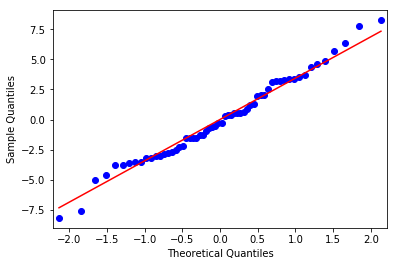

In [31]:
# Q-Q plot
res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()

\# using pyvttbl<br>
*Marsja also demonstrates a simpler, more informative method using the pyvttbl module. Unfortunately, pyvttbl is incompatable with Python3 and no longer actively maintained.*

#### Test of two variances<a class="anchor" id="twovar"></a>

The f-distribution is also used in the hypothesis test for two sample variances. The test assumes the populations are normally distributed and independent and is very sensitive to deviations from normality.

$F = \Large\frac{(s_1)^2}{(s_2)^2}$<br><br>
where $(s_1)^2$ and $(s_2)^2$ are the sample variances<br>
and the dof for the f-distribution are dfn = $n_1 - 1$ and dfd = $n_2 - 1$<br>

In [32]:
# Illowsky 13.5
#  null hypothesis: s1 >= s2
#  alternative hypothesis: s1 < s2  # left-tailed test
n1 = 30
n2 = 30
s1 = 52.3
s2 = 89.9

f_ratio = s1 / s2
p_val = stats.f.cdf(f_ratio, (n1 - 1), (n2 - 1))
print('The p-value = {0:.4f}'.format(p_val))

# Flipping the ratio and the tail gives the same p-value
f_ratio = s2 / s1
p_val = stats.f.sf(f_ratio, (n2 - 1), (n1 - 1))
print('The p-value = {0:.4f}'.format(p_val))


The p-value = 0.0753
The p-value = 0.0753


## Sources<a class="anchor" id="sources"></a>

Illowsky, Barbara; Dean, Susan. Introductory Statistics. OpenStax College. Kindle Edition
https://openstax.org/details/introductory-statistics

SciPy 1.0.0 Release Notes https://docs.scipy.org/doc/scipy/reference/index.html

Cohen Jacob. The Earth Is Round (p < .05) https://www.ics.uci.edu/~sternh/courses/210/cohen94_pval.pdf

Marsja, Erik. https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/

Marsja Erik. https://www.marsja.se/three-ways-to-carry-out-2-way-anova-with-python/
